<a href="https://colab.research.google.com/github/leo-soumyajit/Data-Analysis-Basic/blob/main/Missing_Data_Analysis_and_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/01_missing_values.csv')
print(df.head())
print()
print(df.tail())

  Employee_ID First_Name Last_Name                 Email     Phone Department  \
0        E001       John     Smith  john.smith@email.com  555-0101         IT   
1        E002      Sarah   Johnson     sarah.j@email.com       NaN         HR   
2        E003        NaN  Williams                   NaN  555-0103    Finance   
3        E004    Michael       NaN   michael.w@email.com  555-0104        NaN   
4        E005       Emma     Brown                   NaN       NaN         IT   

    Salary   Hire_Date Manager_ID Office_Location  Years_Experience  
0  50000.0  2020-01-15       M001        New York               5.0  
1      NaN  2019-06-20        NaN             NaN               8.0  
2  55000.0         NaN       M002         Chicago               NaN  
3  60000.0  2021-03-10       M001          Boston               3.0  
4  48000.0         NaN        NaN             NaN               7.0  

   Employee_ID First_Name Last_Name              Email     Phone Department  \
15        E01

In [9]:
print("Dataset Shape", df.shape)
print("Dimension", df.ndim)
print("Size", df.size)
print("Column Names",df.columns.tolist())
print("Index",df.index.tolist())
print("Data Types \n",df.dtypes)
df.describe()
print("Information about 'df' ")
df.info()

Dataset Shape (20, 11)
Dimension 2
Size 220
Column Names ['Employee_ID', 'First_Name', 'Last_Name', 'Email', 'Phone', 'Department', 'Salary', 'Hire_Date', 'Manager_ID', 'Office_Location', 'Years_Experience']
Index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Data Types 
 Employee_ID          object
First_Name           object
Last_Name            object
Email                object
Phone                object
Department           object
Salary              float64
Hire_Date            object
Manager_ID           object
Office_Location      object
Years_Experience    float64
dtype: object
Information about 'df' 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       20 non-null     object 
 1   First_Name        16 non-null     object 
 2   Last_Name         15 non-null     object 
 3   Email        

In [16]:
print("="*80)
print("Missing Values")
print("="*80)

total_cells = df.size
missing_cells = df.isnull().sum().sum()

print(f"Total Cells : {total_cells}")
print(f"Missing Cells : {missing_cells}")
print(f"Missing Cells Percentage : {round((missing_cells/total_cells)*100,2)}%")

Missing Values
Total Cells : 220
Missing Cells : 61
Missing Cells Percentage : 27.73%


In [18]:
#detailed breakdown  by column
print("_"*80)
print("Missing Values by Column")
print("_"*80)
missing_data = pd.DataFrame({
    'Column':df.columns,
    'Missing Count':df.isnull().sum().values,
    'Missing Percentage':(df.isnull().sum().values /len(df) *100 ).round(2),
    'Data_Types':df.dtypes.values,
    'Non Null Count': df.notnull().sum().values
})

missing_data = missing_data.sort_values(by='Missing Count', ascending=False)
print(missing_data.to_string(index=False))

________________________________________________________________________________
Missing Values by Column
________________________________________________________________________________
          Column  Missing Count  Missing Percentage Data_Types  Non Null Count
 Office_Location              8                40.0     object              12
           Email              7                35.0     object              13
       Hire_Date              7                35.0     object              13
      Manager_ID              7                35.0     object              13
          Salary              6                30.0    float64              14
           Phone              6                30.0     object              14
      Department              6                30.0     object              14
       Last_Name              5                25.0     object              15
Years_Experience              5                25.0    float64              15
      First_Name       

In [19]:
#detailed breakdown  by Row
print("_"*80)
print("Missing Values by Row")
print("_"*80)

rows_with_missing_values = df[df.isnull().any(axis=1)]
print(f" {len(rows_with_missing_values)} out of {len(df)} rows have missing values ({len(rows_with_missing_values)/len(df)*100:.1f}%)")

________________________________________________________________________________
Missing Values by Row
________________________________________________________________________________
 19 out of 20 rows have missing values (95.0%)


In [21]:
print("_"*80)
print("Missing Value Patterns (Top 10)")
print("_"*80)

missing_patterns = df.isnull().groupby(df.isnull().apply(lambda x: tuple(x), axis=1)).size()
missing_patterns = missing_patterns.sort_values(ascending=False).head(10)
for i, (pattern, count) in enumerate(missing_patterns.items(),1):
    missing_cols = [col for col, is_missing in zip(df.columns,pattern) if is_missing]
    if missing_cols:
      print(f"{i}. Missing {missing_cols}: {count} rows")
    else:
      print(f"{i}. Complete rows : {count}")

________________________________________________________________________________
Missing Value Patterns (Top 10)
________________________________________________________________________________
1. Complete rows : 1
2. Missing ['Manager_ID']: 1 rows
3. Missing ['Department', 'Years_Experience']: 1 rows
4. Missing ['Department', 'Salary', 'Years_Experience']: 1 rows
5. Missing ['Phone', 'Salary', 'Manager_ID', 'Office_Location']: 1 rows
6. Missing ['Email', 'Hire_Date']: 1 rows
7. Missing ['Email', 'Hire_Date', 'Office_Location', 'Years_Experience']: 1 rows
8. Missing ['Email', 'Hire_Date', 'Manager_ID', 'Office_Location']: 1 rows
9. Missing ['Email', 'Department', 'Hire_Date', 'Office_Location']: 1 rows
10. Missing ['Email', 'Phone', 'Manager_ID', 'Office_Location']: 1 rows


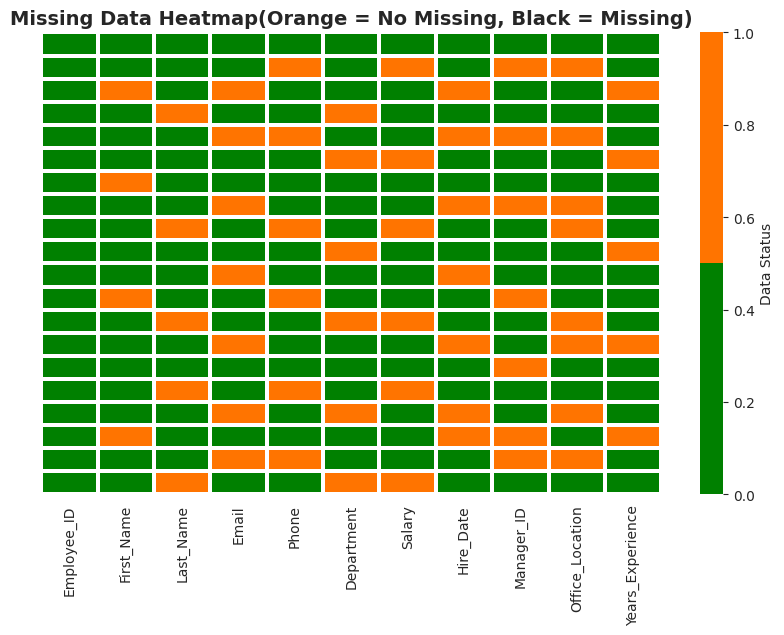

In [37]:
sns.set_style('whitegrid')
#1 Missing Data heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=True, cmap=plt.cm.colors.ListedColormap(['green','#FF7400']),
            yticklabels=False, linewidths=1.5, linecolor='white',
            cbar_kws={'label':'Data Status'})
plt.title('Missing Data Heatmap(Orange = No Missing, Black = Missing)', fontsize=14, fontweight='bold')
plt.show()


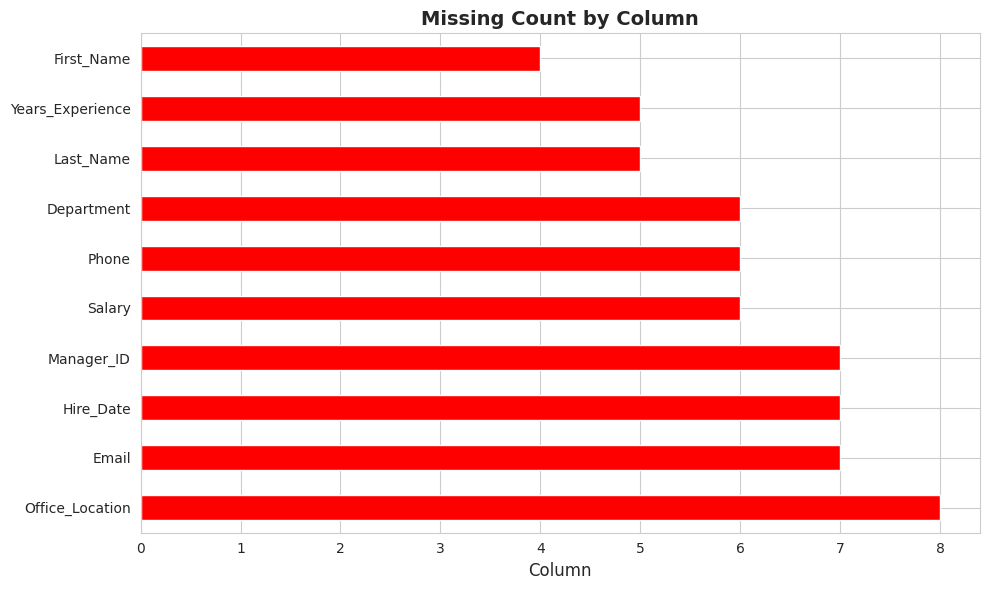

In [40]:
#Missing Count by Column
plt.figure(figsize=(10,6))
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count[missing_count>0].plot(kind='barh',color='red')
plt.title('Missing Count by Column',fontsize=14,fontweight='bold')
plt.xlabel('Column',fontsize=12)
plt.tight_layout()
plt.show()

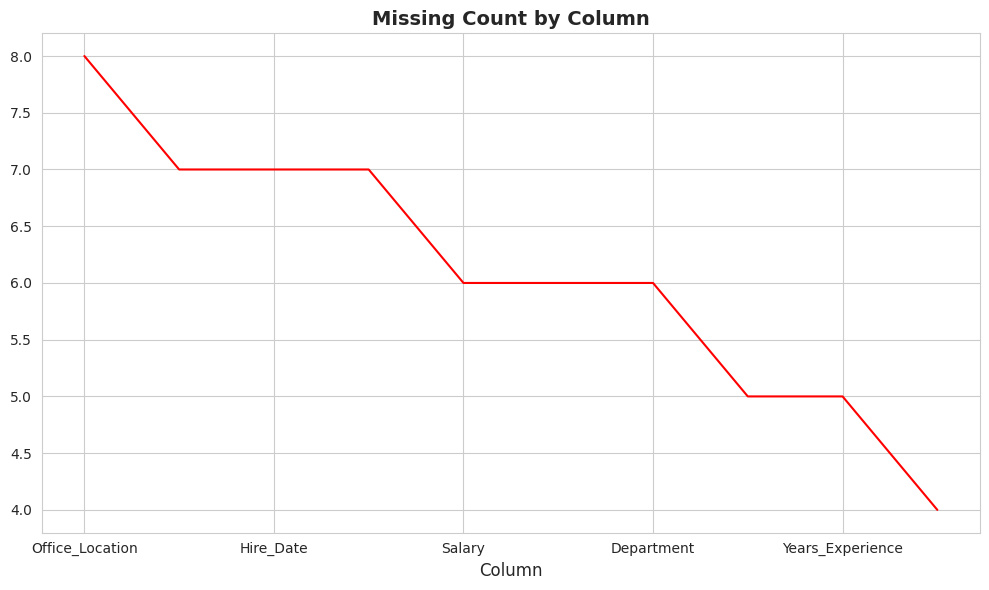

In [41]:
#Missing Count by Column
plt.figure(figsize=(10,6))
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count[missing_count>0].plot(color='red')
plt.title('Missing Count by Column',fontsize=14,fontweight='bold')
plt.xlabel('Column',fontsize=12)
plt.tight_layout()
plt.show()

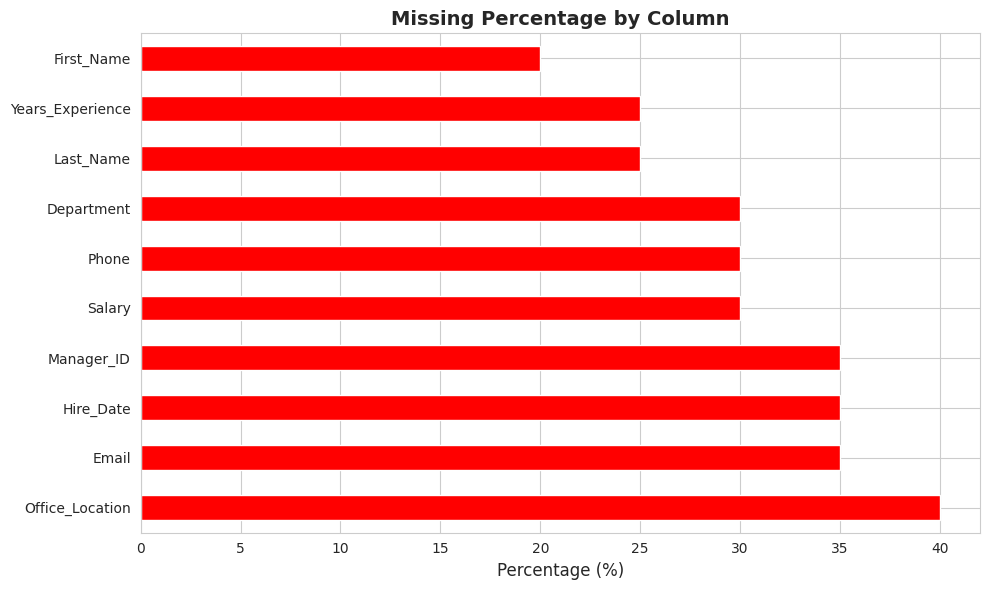

In [43]:
#Missing Percentage by Column
plt.figure(figsize=(10,6))
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct[missing_pct>0].plot(kind='barh',color='red')
plt.title('Missing Percentage by Column',fontsize=14,fontweight='bold')
plt.xlabel('Percentage (%)',fontsize=12)
plt.tight_layout()
plt.show()

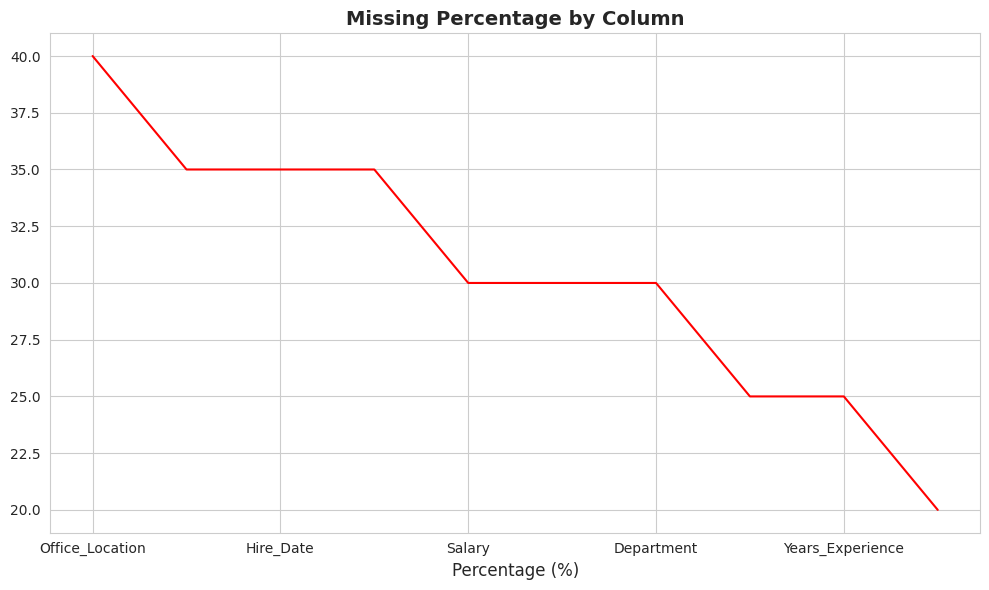

In [44]:
#Missing Percentage by Column
plt.figure(figsize=(10,6))
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct[missing_pct>0].plot(color='red')
plt.title('Missing Percentage by Column',fontsize=14,fontweight='bold')
plt.xlabel('Percentage (%)',fontsize=12)
plt.tight_layout()
plt.show()

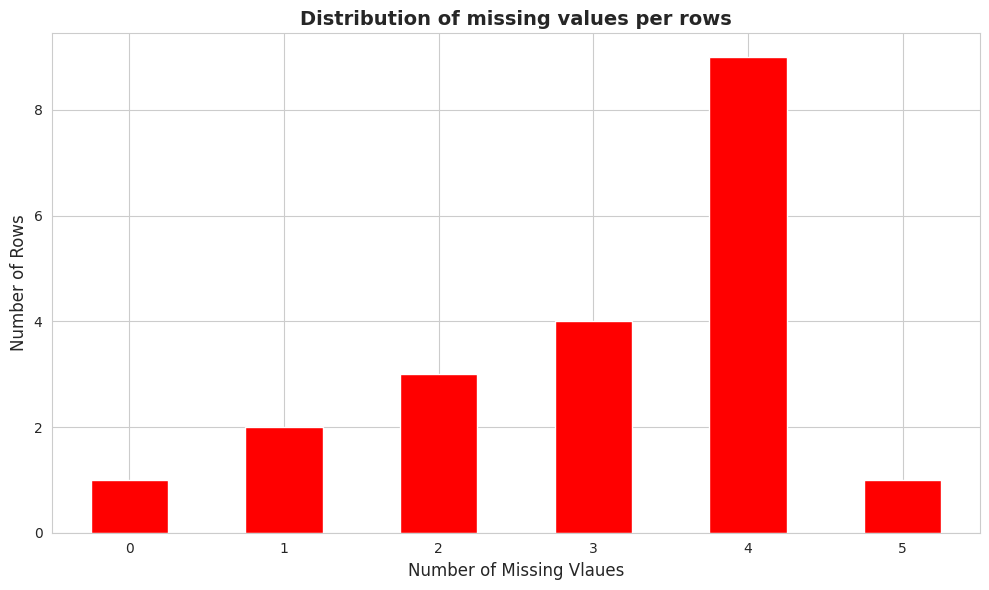

In [48]:
#Missing Values per Row
plt.figure(figsize=(10,6))
missing_per_row = (df.isnull().sum(axis=1)).value_counts().sort_index()
missing_per_row[missing_per_row>0].plot(kind='bar',color='red')
plt.title('Distribution of missing values per rows',fontsize=14,fontweight='bold')
plt.xlabel('Number of Missing Vlaues',fontsize=12)
plt.ylabel('Number of Rows',fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()